<a href="https://colab.research.google.com/github/Gerda-T/Couple_RecSys/blob/main/COUPLE_TEST_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE AIM IS TO RECOMMEND A CERTAIN NUMBER OF TIPS TO EACH USER

WE NEED TO FIND THE SIMILARITIES BETWEEN THE SENTENCES ON THE QUESTIONS AND ALSO THE TIPS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [ ]:
from google.colab import files
uplaoded = files.upload()

Saving coupleTest.xlsx to coupleTest.xlsx


Exploratory Data Analysis

In [ ]:
df = pd.read_excel('coupleTest.xlsx')

In [ ]:
df.head()

,assertion_id,assertions_tips
0,1,I am capable of getting into fights easily an...
1,2,I like to have the choice until the last minute
2,3,I like to charm and seduce
3,5,I often think and suffer from negative things ...
4,4,I am not very attentive to the negative emotio...


In [ ]:
df.shape

(40, 2)

In [ ]:
df.columns

Index(['assertion_id', 'assertions_tips'], dtype='object')

In [ ]:
from google.colab import files
uplaoded = files.upload()

Saving coupleRatings.xlsx to coupleRatings.xlsx


In [ ]:
df_ratings = pd.read_excel('coupleRatings.xlsx')

In [ ]:
df_ratings.head(10)

,userId,assertion_id,ratings
0,1,1,0.2
1,1,3,0.5
2,1,5,0.8
3,1,4,0.6
4,2,9,0.8
5,2,8,0.8
6,2,7,0.6
7,2,6,0.4
8,3,10,0.8
9,3,11,0.6


In [ ]:
data = pd.read_excel('coupleTest.xlsx',usecols=['assertion_id','assertions_tips'],dtype={'assertion_id': 'int32', 'assertions_tips': 'str'})
rating_df=pd.read_excel('coupleRatings.xlsx',usecols=['userId', 'assertion_id', 'ratings'],
    dtype={'userId': 'int32', 'assertion_id': 'int32', 'ratings': 'float32'})

In [ ]:
data.head(10)

,assertion_id,assertions_tips
0,1,I am capable of getting into fights easily an...
1,2,I like to have the choice until the last minute
2,3,I like to charm and seduce
3,5,I often think and suffer from negative things ...
4,4,I am not very attentive to the negative emotio...
5,10,I don't like theories unless they have practic...
6,6,I worry a lot about the future or upcoming eve...
7,7,I am a reasonable and rigorous person.
8,8,I have a tendency to over-idealize or devalue ...
9,9,I like to be an observer


In [ ]:
rating_df.head(10)

,userId,assertion_id,ratings
0,1,1,0.2
1,1,3,0.5
2,1,5,0.8
3,1,4,0.6
4,2,9,0.8
5,2,8,0.8
6,2,7,0.6
7,2,6,0.4
8,3,10,0.8
9,3,11,0.6


Merging the data into a single data frame

In [ ]:
df = pd.merge(rating_df,data,on='assertion_id')
df.head(10)

,userId,assertion_id,ratings,assertions_tips
0,1,1,0.2,I am capable of getting into fights easily an...
1,1,3,0.5,I like to charm and seduce
2,1,5,0.8,I often think and suffer from negative things ...
3,1,4,0.6,I am not very attentive to the negative emotio...
4,2,9,0.8,I like to be an observer
5,2,8,0.8,I have a tendency to over-idealize or devalue ...
6,2,7,0.6,I am a reasonable and rigorous person.
7,2,6,0.4,I worry a lot about the future or upcoming eve...
8,3,10,0.8,I don't like theories unless they have practic...
9,3,11,0.6,When I start speaking I don't always know what...


Feature Engineering

In [ ]:
df.groupby('assertions_tips')['ratings'].mean().sort_values(ascending=False).head(10)

assertions_tips
I have a tendency to be dramatic in expressing emotions                                                                   0.8
Let your partner express himself without cutting him                                                                      0.8
You need to take care of your self and emotions in other not to affect others                                             0.8
You need to realise that you are not the only person in the relationship. The choice should be taken together as unity    0.8
You need to charm and seduce your partner for the love to prosper and not somebody that is not meaningful to you          0.8
I have a tendency to over-idealize or devalue the people around me                                                        0.8
I have few friends and do not bond easily                                                                                 0.8
I don't like theories unless they have practical and direct applications                              

In [ ]:
df.groupby('assertions_tips')['ratings'].count().sort_values(ascending=False).head(10)

assertions_tips
Stay guarded but also leave room for you partner to get to know you more    2
 I am capable of getting into fights easily and can be aggressive           1
I have a tendency to be dramatic in expressing emotions                     1
I like to charm and seduce                                                  1
I like to be an observer                                                    1
I like intimate and deep conversations                                      1
I have few friends and do not bond easily                                   1
I have a tendency to over-idealize or devalue the people around me          1
I handle criticism very badly                                               1
I worry a lot about the future or upcoming events.                          1
Name: ratings, dtype: int64

In [ ]:
ratings = pd.DataFrame(df.groupby('assertions_tips')['ratings'].mean())
ratings.head()

,ratings
assertions_tips,
Be kind hearted with your partner,0.4
Do not worry on what you can not control. Instead cherish the present,0.6
I am a reasonable and rigorous person.,0.6
I am not very attentive to the negative emotions I arouse in others,0.6
"I am often tense, even physically",0.4


In [ ]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('assertions_tips')['ratings'].count())
ratings.head()

,ratings,num of ratings
assertions_tips,,
Be kind hearted with your partner,0.4,1
Do not worry on what you can not control. Instead cherish the present,0.6,1
I am a reasonable and rigorous person.,0.6,1
I am not very attentive to the negative emotions I arouse in others,0.6,1
"I am often tense, even physically",0.4,1


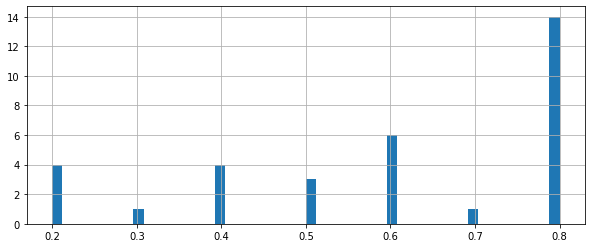

In [ ]:
plt.figure(figsize=(10,4))
ratings['ratings'].hist(bins=50)

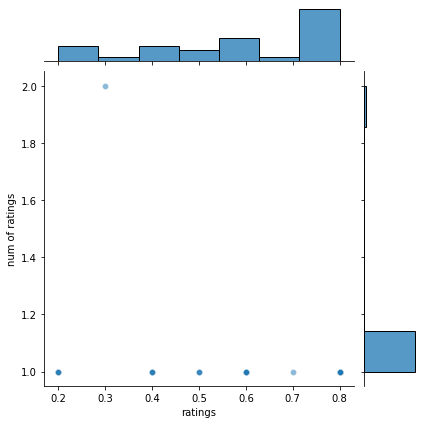

In [ ]:
sns.jointplot(x='ratings',y='num of ratings',data=ratings,alpha=0.5)

In [ ]:
combine_rating = df.dropna(axis = 0, subset = ['assertions_tips'])
combine_ratingCount = (combine_rating.
     groupby(by = ['assertions_tips'])['ratings'].
     count().
     reset_index().
     rename(columns = {'ratings': 'totalRatingCount'})
     [['assertions_tips', 'totalRatingCount']]
    )
combine_ratingCount.head()

,assertions_tips,totalRatingCount
0,Be kind hearted with your partner,1
1,Do not worry on what you can not control. Inst...,1
2,I am a reasonable and rigorous person.,1
3,I am not very attentive to the negative emotio...,1
4,"I am often tense, even physically",1


In [ ]:
rating_with_totalRatingCount = combine_rating.merge(combine_ratingCount, left_on = 'assertions_tips', right_on = 'assertions_tips', how = 'left')
rating_with_totalRatingCount.head()

,userId,assertion_id,ratings,assertions_tips,totalRatingCount
0,1,1,0.2,I am capable of getting into fights easily an...,1
1,1,3,0.5,I like to charm and seduce,1
2,1,5,0.8,I often think and suffer from negative things ...,1
3,1,4,0.6,I am not very attentive to the negative emotio...,1
4,2,9,0.8,I like to be an observer,1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(combine_ratingCount['totalRatingCount'].describe())

count   33.000
mean     1.030
std      0.174
min      1.000
25%      1.000
50%      1.000
75%      1.000
max      2.000
Name: totalRatingCount, dtype: float64


Most Meaningful Tip

In [ ]:
popularity_threshold = 2
rating_assertion= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_assertion.head()

,userId,assertion_id,ratings,assertions_tips,totalRatingCount
14,4,18,0.200,Stay guarded but also leave room for you partn...,2
29,9,39,0.400,Stay guarded but also leave room for you partn...,2


In [ ]:
rating_assertion.shape

(2, 5)

In [ ]:
#just creating a pivot matrix
assert_features_df=rating_assertion.pivot_table(index='assertions_tips',columns='userId',values='ratings').fillna(0)
assert_features_df.head()

userId,4,9
assertions_tips,,
Stay guarded but also leave room for you partner to get to know you more,0.200,0.400


Here, we are using KNN. It finds the k most similar items to a particular instance based on a given distance metric

In [ ]:
from scipy.sparse import csr_matrix

assert_features_df_matrix = csr_matrix(assert_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(assert_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
assert_features_df.shape

(1, 2)

In [ ]:
query_index = np.random.choice(assert_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(assert_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors=1)

0


In [ ]:
assert_features_df.head()

userId,4,9
assertions_tips,,
Stay guarded but also leave room for you partner to get to know you more,0.200,0.400


Recommending a tip

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Tip: \n{0}'.format(assert_features_df.index[query_index]))

Tip: 
Stay guarded but also leave room for you partner to get to know you more
